## Data Cleaning 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import en_core_web_sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt  
from wordcloud import WordCloud
from pandas_profiling import ProfileReport   
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
asd=[1, 2, 1, 3, 3, 2, 2]

In [3]:
dsp=pd.DataFrame(asd, columns=['rank'])

In [4]:
dsp['name']=['a', 'b', 'b', 'a', 'a', 'c', 'c']

In [25]:
dsp

,rank,name
0,1,a
1,2,b
2,1,b
3,3,a
4,3,a
5,2,c
6,2,c


In [ ]:
(1,2)  b 
(1,3)  a
(2,3)  b  2

In [26]:
#df_dummy = df2.subject_list.str.join(sep='?').str.get_dummies(sep='?')
vals = dsp['rank'].unique()
combos = list((vals[j], vals[i]) for i in range(len(vals)) for j in range(len(vals)) if i>j)
print(combos)

[(1, 2), (1, 3), (2, 3)]


In [82]:
l1=[]
l2=[]
count=0
for x, y in combos:
    l1.append(dsp.index[dsp['rank']==x])
    l2.append(dsp.index[dsp['rank']==y])
    print(l1)
    print(l2)
    for i, j in zip(l1,l2):
#         if dsp['name'].iloc[i] == dsp['name'].iloc[j]:
#             count+=1
        #print(i, j, count)
        print(dsp['name'].iloc[i])
    count=0
    l1=[]
    l2=[]
        
    

[Int64Index([0, 2], dtype='int64')]
[Int64Index([1, 5, 6], dtype='int64')]
0    a
2    b
Name: name, dtype: object
[Int64Index([0, 2], dtype='int64')]
[Int64Index([3, 4], dtype='int64')]
0    a
2    b
Name: name, dtype: object
[Int64Index([1, 5, 6], dtype='int64')]
[Int64Index([3, 4], dtype='int64')]
1    b
5    c
6    c
Name: name, dtype: object


In [70]:
count

21

In [5]:
lis=[]
com=[]
for k in dsp['name'].unique():
    asd= (dsp[dsp['name']==k]['rank'].unique()).tolist()
    com = list((asd[j], asd[i]) for i in range(len(asd)) for j in range(len(asd)) if i>j)

In [6]:
print(com)

[]


In [49]:
res

[(0, 0)]

In [7]:
from collections import defaultdict
 
countdict = {}
countdict = defaultdict(lambda :0, countdict)
 
for k in dsp['name'].unique():
    asd = dsp[dsp['name']==k]['rank'].unique()
    #print(asd)
    asd = asd.tolist()
    #print(asd)
    com = list((asd[j], asd[i]) for i in range(len(asd)) for j in range(len(asd)) if i>j)
    #print(com)
    for c in com:
        countdict[c]+=1
 
print(countdict)

defaultdict(<function <lambda> at 0x00000165CE83DA60>, {(1, 3): 1, (2, 1): 1})


In [96]:
sad= dsp[dsp['name']==k]['rank']
sad

5    2
6    2
Name: rank, dtype: int64

In [95]:
dsp['Rat']=dsp.loc[dsp['name'] == k, 'rank']
dsp

,rank,name,Rat
0,1,a,NaN
1,2,b,NaN
2,1,b,NaN
3,3,a,NaN
4,3,a,NaN
5,2,c,2.0
6,2,c,2.0


In [10]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

^C
Note: you may need to restart the kernel to use updated packages.


In [11]:
df=pd.read_csv("C:/Users/anagha.bhople/Desktop/Sentiment Analysis/Womens Clothing E-Commerce Reviews.csv")

In [12]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [13]:
df.drop(['Unnamed: 0','Age','Clothing ID', 'Division Name', 'Department Name', 'Class Name'], axis = 1, inplace=True)
df.head(5)

,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6


In [14]:
df.reset_index(inplace=True)
df.head(5)

,index,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0
3,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6


In [15]:
df.set_index('index')
df.head(5)

,index,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0
3,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6


In [17]:
df['Review Text'].index

RangeIndex(start=0, stop=23486, step=1)

In [16]:
index_names = df[df['Review Text'].isnull() & df['Title'].isnull()].index 
len(index_names)

844

In [17]:
df['Review Text'].isnull().sum(axis = 0)

845

In [18]:
df['Title'].isnull().sum(axis = 0)

3810

In [19]:
df.drop(index_names, inplace = True) 
df.head(5)

,index,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0
3,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6


In [20]:
df['Review Text'].isnull().sum(axis = 0)

1

In [21]:
df['Title'].isnull().sum(axis = 0)

2966

In [22]:
idx=df[df['Review Text'].isnull()].index
df['Review Text'][idx]
df['Title'][idx]
df['Review Text'][idx]=df['Title'][idx]
df['Review Text'][idx]

<ipython-input-22-01c05e9741bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text'][idx]=df['Title'][idx]


10220    Such a beautiful dress!
Name: Review Text, dtype: object

In [23]:
df.drop(['Title'], axis = 1, inplace=True)
df.head(5)

,index,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,I had such high hopes for this dress and reall...,3,0,0
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,4,This shirt is very flattering to all due to th...,5,1,6


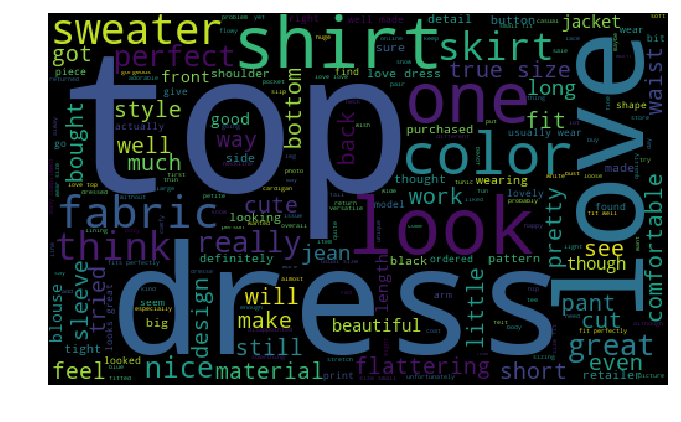

In [160]:
txt=''.join(df['Review Text'])
wc=WordCloud(width=500, height=300).generate(txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [110]:
word_dict={}
word_dict=wc.words_

In [155]:
a = sorted(word_dict.items(), key=lambda x: x[1]) 
a[-5 :]

[('fabric', 0.587431693989071),
 ('fit', 0.646448087431694),
 ('look', 0.6595628415300546),
 ('top', 0.9573770491803278),
 ('dress', 1.0)]

In [134]:
a[0: 5 ]

[('want', 0.06502732240437159),
 ('another', 0.06557377049180328),
 ('pair', 0.06557377049180328),
 ('order', 0.06557377049180328),
 ('know', 0.06666666666666667)]

In [74]:
df['Positive Review']=df.loc[df['Label'] == 1, 'Review Text']
df['Negative Review']=df.loc[df['Label'] == 0, 'Review Text']

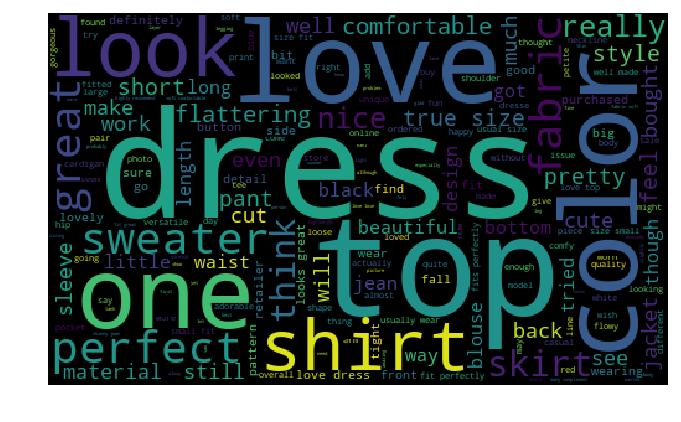

In [156]:
df['Positive Review']=df['Positive Review'].astype(str)
txt=''.join(df['Positive Review'])
wc=WordCloud(width=500, height=300).generate(txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

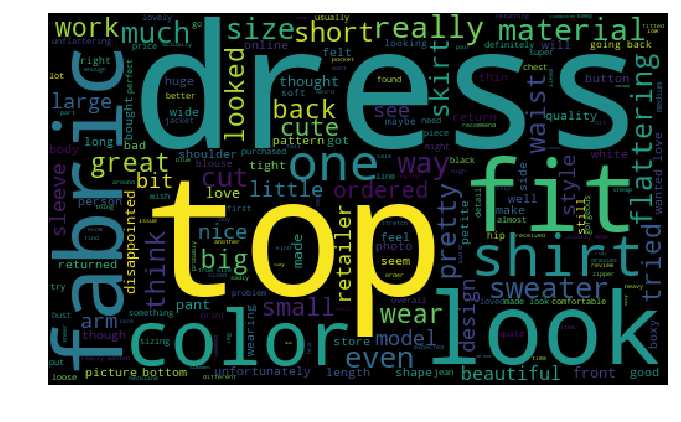

In [157]:
df['Negative Review']=df['Negative Review'].astype(str)
txt=''.join(df['Negative Review'])
wc=WordCloud(width=500, height=300).generate(txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [1]:
def char_count(x):
    s=x.split()
    s=str(s)
    x=' '.join(s)
    return len(x)

df['Char_Count']=df['Review Text'].apply(lambda x: char_count(x.encode('utf-8')))

NameError: name 'df' is not defined

In [ ]:
def word_count(x):
    return len(str(x).split())

df['Word_Count']=df['Review Text'].apply(lambda x: word_count(x.encode('utf-8')))

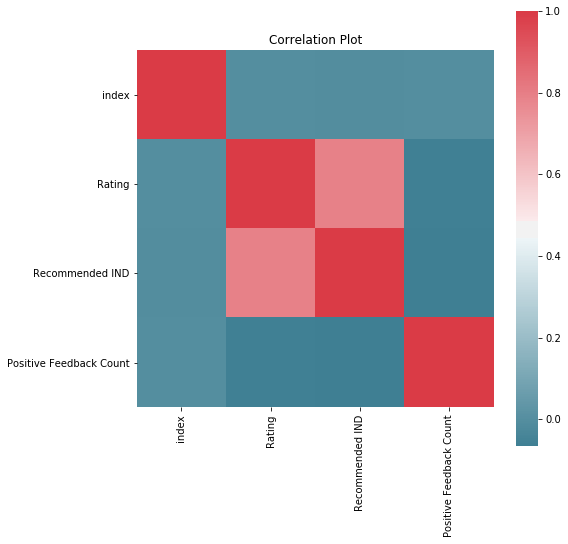

In [16]:
cor= df.corr(method='pearson')
fig, ax =plt.subplots(figsize=(8, 8))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [17]:
df.groupby('Rating').count()

,index,Review Text,Recommended IND,Positive Feedback Count
Rating,,,,
1,821,821,821,821
2,1549,1549,1549,1549
3,2823,2823,2823,2823
4,4908,4908,4908,4908
5,12541,12541,12541,12541


In [18]:
df['Rating'].value_counts()

5    12541
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

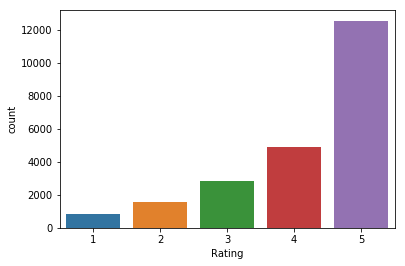

In [19]:
sns.countplot(x='Rating',data=df)

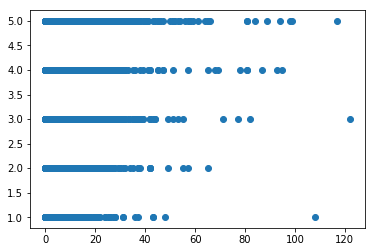

In [20]:
scatterplot= plt.scatter(x='Positive Feedback Count', y= 'Rating', cmap='coolwarm', data=df)

In [21]:
df['Rating_for_Not_Recommended']=df.loc[df['Recommended IND'] == 0, 'Rating']
df.head(5)

,index,Review Text,Rating,Recommended IND,Positive Feedback Count,Rating_for_Not_Recommended
0,0,Absolutely wonderful - silky and sexy and comf...,4,1,0,NaN
1,1,Love this dress! it's sooo pretty. i happene...,5,1,4,NaN
2,2,I had such high hopes for this dress and reall...,3,0,0,3.0
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,NaN
4,4,This shirt is very flattering to all due to th...,5,1,6,NaN


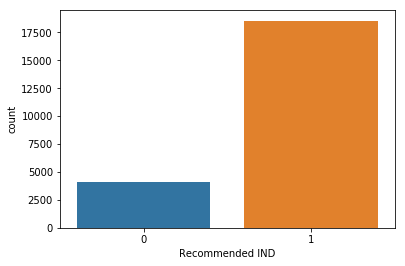

In [22]:
sns.countplot(x='Recommended IND',data=df)

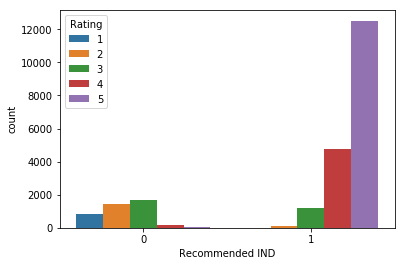

In [23]:
sns.countplot(x='Recommended IND', hue='Rating', data=df)

In [48]:
df.describe()

,index,Rating,Recommended IND,Positive Feedback Count,Rating_for_Not_Recommended,Label,Label_3C
count,22642.000000,22642.000000,22642.000000,22642.000000,4101.000000,22642.000000,22642.000000
mean,11740.781866,4.183597,0.818876,2.630466,2.303341,0.770647,1.020007
std,6781.815267,1.115751,0.385129,5.786062,0.847470,0.420426,0.478500
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5872.250000,4.000000,1.000000,0.000000,2.000000,1.000000,1.000000
50%,11732.500000,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,17620.750000,5.000000,1.000000,3.000000,3.000000,1.000000,1.000000
max,23485.000000,5.000000,1.000000,122.000000,5.000000,1.000000,2.000000


In [24]:
def la(x):
    if(x>3):
        return 1
    else:
        return 0

In [25]:
df['Label']=df['Rating'].apply(lambda x:la(x))

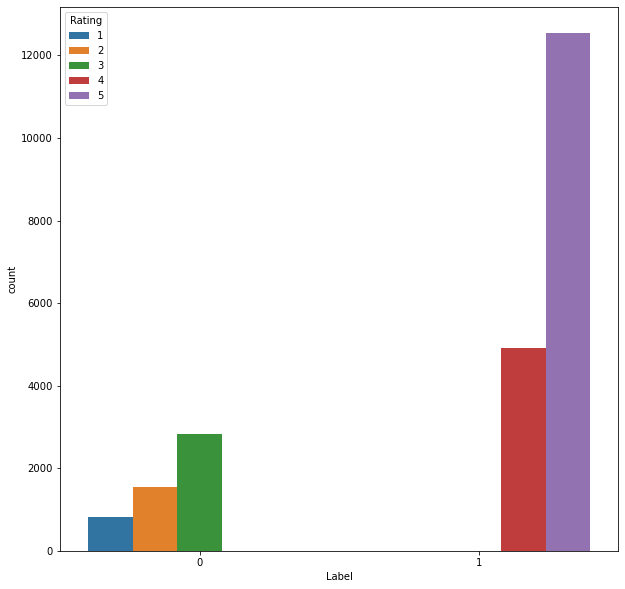

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x='Label', hue='Rating', data=df)

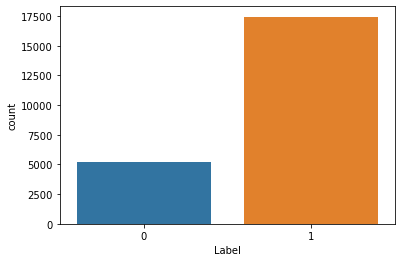

In [27]:
sns.countplot(x='Label',data=df)

In [28]:
df.groupby('Label').count()

,index,Review Text,Rating,Recommended IND,Positive Feedback Count,Rating_for_Not_Recommended
Label,,,,,,
0,5193,5193,5193,5193,5193,3914
1,17449,17449,17449,17449,17449,187


In [29]:
df['Label'].value_counts()

1    17449
0     5193
Name: Label, dtype: int64

In [30]:
def label(x):
    if(x>3):
        return 1
    elif(x==3):
        return 2
    else:
        return 0

In [31]:
df['Label_3C']=df['Rating'].apply(lambda x:label(x))

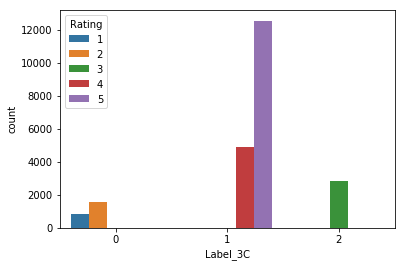

In [32]:
sns.countplot(x='Label_3C', hue='Rating', data=df)

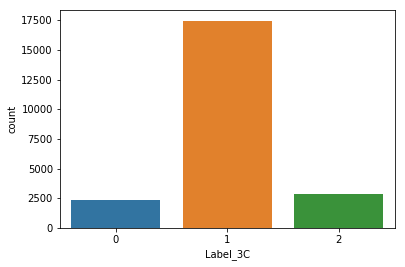

In [33]:
sns.countplot(x='Label_3C',data=df)

In [34]:
df.groupby('Label').count()

,index,Review Text,Rating,Recommended IND,Positive Feedback Count,Rating_for_Not_Recommended,Label_3C
Label,,,,,,,
0,5193,5193,5193,5193,5193,3914,5193
1,17449,17449,17449,17449,17449,187,17449


In [35]:
df['Label'].value_counts()

1    17449
0     5193
Name: Label, dtype: int64

In [36]:
df.head(5)

,index,Review Text,Rating,Recommended IND,Positive Feedback Count,Rating_for_Not_Recommended,Label,Label_3C
0,0,Absolutely wonderful - silky and sexy and comf...,4,1,0,NaN,1,1
1,1,Love this dress! it's sooo pretty. i happene...,5,1,4,NaN,1,1
2,2,I had such high hopes for this dress and reall...,3,0,0,3.0,0,2
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,NaN,1,1
4,4,This shirt is very flattering to all due to th...,5,1,6,NaN,1,1


In [40]:
profile= ProfileReport(df, title='Sentiment Analysis', html={'style':{'full_width': True}})

TypeError: _plot_histogram() got an unexpected keyword argument 'html'

Process PoolWorker-2:
Process PoolWorker-4:
Process PoolWorker-1:
Process PoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
    self.run()
  File "/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/anaconda2/lib/python2.7/multip

In [ ]:
profile.to_widgets()

In [ ]:
profile.to_notebook_iframe()

In [138]:
Test_sentence = df.loc[df['index'] == 6 , 'Review Text']
Test_sentence

6    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

In [142]:
import unicodedata
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

df['Review Text new']=df['Review Text'].apply(lambda x: strip_accents(x))



#Spelling correction

# from textblob import TextBlob
# #x= 'Absolutely wondful - silky and sexy and comfortable'
# x=TextBlob(str(Test_sentence)).correct()
# x


def spell_check(x):
    x=TextBlob(str(x)).correct()
    return ''.join(x)

df['Review Text new']=df['Review Text new'].apply(lambda x: spell_check(x))

In [143]:
df.head(20)

,index,Review Text,Rating,Recommended IND,Positive Feedback Count,Rating_for_Not_Recommended,Label,Label_3C,Review Text new,Positive Review,Negative Review
0,0,Absolutely wonderful - silky and sexy and comf...,4,1,0,NaN,1,1,Absolutely wonderful - silk and sex and comfor...,Absolutely wonderful - silky and sexy and comf...,nan
1,1,Love this dress! it's sooo pretty. i happene...,5,1,4,NaN,1,1,Love this dress! it's soon pretty. i happene...,Love this dress! it's sooo pretty. i happene...,nan
2,2,I had such high hopes for this dress and reall...,3,0,0,3.0,0,2,I had such high hopes for this dress and reall...,NaN,I had such high hopes for this dress and reall...
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,NaN,1,1,"I love, love, love this jumpsuit. it's fun, fl...","I love, love, love this jumpsuit. it's fun, fl...",nan
4,4,This shirt is very flattering to all due to th...,5,1,6,NaN,1,1,His shirt is very flattering to all due to the...,This shirt is very flattering to all due to th...,nan
5,5,"I love tracy reese dresses, but this one is no...",2,0,4,2.0,0,0,"I love trace geese dresses, but this one is no...",NaN,"I love tracy reese dresses, but this one is no..."
6,6,I aded this in my basket at hte last mintue to...,5,1,1,NaN,1,1,I added this in my basket at the last minute t...,I aded this in my basket at hte last mintue to...,nan
7,7,"I ordered this in carbon for store pick up, an...",4,1,4,NaN,1,1,"I ordered this in carbon for store pick up, an...","I ordered this in carbon for store pick up, an...",nan
8,8,I love this dress. i usually get an xs but it ...,5,1,0,NaN,1,1,I love this dress. i usually get an is but it ...,I love this dress. i usually get an xs but it ...,nan
9,9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,NaN,1,1,"I'm 5""5' and 125 les. i ordered the s petite t...","I'm 5""5' and 125 lbs. i ordered the s petite t...",nan


In [144]:
df['Review Text new']

0        Absolutely wonderful - silk and sex and comfor...
1        Love this dress!  it's soon pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        His shirt is very flattering to all due to the...
5        I love trace geese dresses, but this one is no...
6        I added this in my basket at the last minute t...
7        I ordered this in carbon for store pick up, an...
8        I love this dress. i usually get an is but it ...
9        I'm 5"5' and 125 les. i ordered the s petite t...
10       Dress runs small esp where the nipper area run...
11       His dress is perfection! so pretty and flatter...
12       More and more i find myself radiant on the rev...
13       Ought the black is to go under the larkspur mi...
14       His is a nice choice for holiday gatherings. i...
15       I took these out of the package and wanted the...
16       Material and color is nice.  the leg opening i.

In [147]:
import re 
def char_count(x):
    s=x.split()
    s=str(s)
    x=' '.join(s)
    return len(x)

df['Char_Count']=df['Review Text new'].apply(lambda x: char_count(x.encode('utf-8')))


def word_count(x):
    return len(str(x).split())

df['Word_Count']=df['Review Text new'].apply(lambda x: word_count(x.encode('utf-8')))

def remove_sapce(x):
    x=' '.join(x.split())
    return x
df['Review Text new']=df['Review Text new'].apply(lambda x: remove_sapce(x))

df['Review Text new']=df['Review Text new'].str.lower()

contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"i'm": "i am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

for key, value in contractions.items():
  key= key.lower()
  value=value.lower()
  
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    return x
df['Review Text new']=df['Review Text new'].apply(lambda x: cont_to_exp(x))


def puntuation_removal(x):
    x=re.sub(r'[^\w]+', " ", x)
    return x

df['Review Text new']=df['Review Text new'].apply(lambda x: puntuation_removal(str(x)))

In [148]:
import spacy
import en_core_web_sm
#from __future__ import unicode_literals
nlp = spacy.load('en_core_web_sm')
def make_to_base(x):
    x_list=[]
    doc=nlp(x)
    for token in doc:
        lemma=token.lemma_
        
        if lemma=='_PRON_' or lemma == 'be' or lemma == 'is': 
            lemma=token.text
            
        
        x_list.append(lemma)
    return ' '.join(x_list)

df['Review Text new']=df['Review Text new'].apply(lambda x: make_to_base(x.decode("utf-8")))

In [149]:
df.head()

,index,Review Text,Rating,Recommended IND,Positive Feedback Count,Rating_for_Not_Recommended,Label,Label_3C,Review Text new,Positive Review,Negative Review,Char_Count,Word_Count
0,0,Absolutely wonderful - silky and sexy and comf...,4,1,0,NaN,1,1,absolutely wonderful silk and sex and comfortable,Absolutely wonderful - silky and sexy and comf...,nan,151,8
1,1,Love this dress! it's sooo pretty. i happene...,5,1,4,NaN,1,1,love this dress -PRON- s soon pretty i happen ...,Love this dress! it's sooo pretty. i happene...,nan,969,62
2,2,I had such high hopes for this dress and reall...,3,0,0,3.0,0,2,i have such high hope for this dress and reall...,NaN,I had such high hopes for this dress and reall...,1581,98
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,NaN,1,1,i love love love this jumpsuit -PRON- s fun fl...,"I love, love, love this jumpsuit. it's fun, fl...",nan,379,22
4,4,This shirt is very flattering to all due to th...,5,1,6,NaN,1,1,-PRON- shirt is very flattering to all due to ...,This shirt is very flattering to all due to th...,nan,595,36


[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

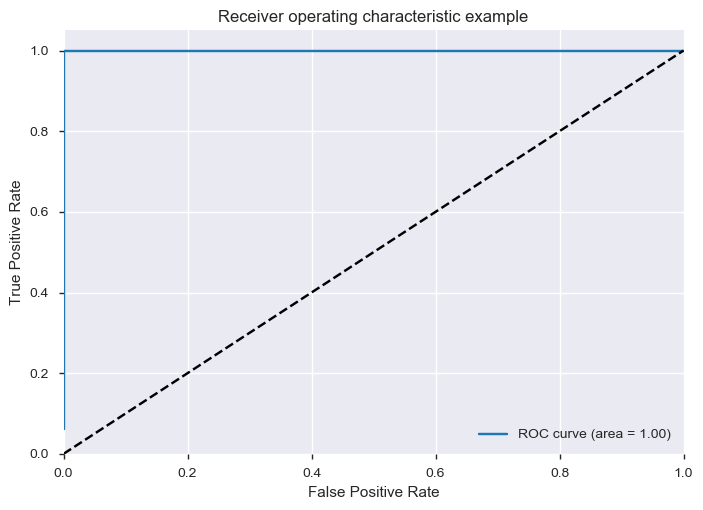

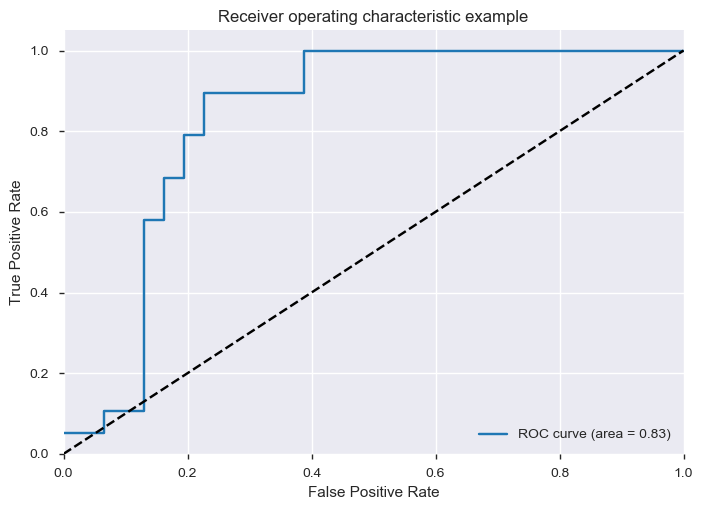

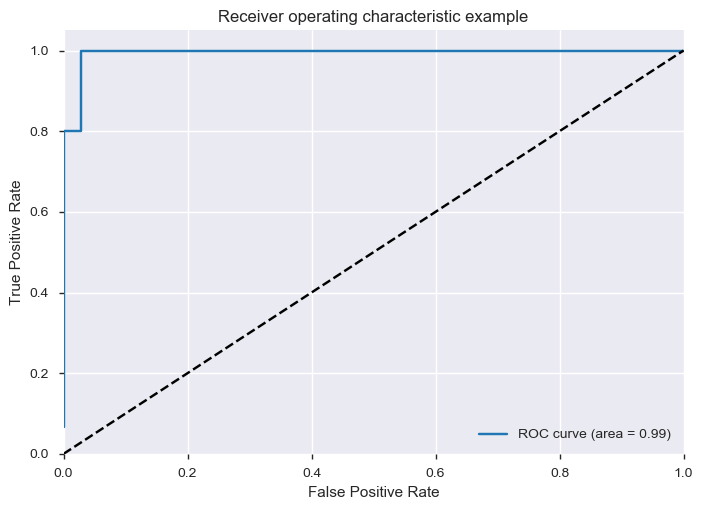

In [153]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
print(y)

n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

print(y_test)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)


print(y_score)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [162]:
def tokenize(x):
    x= TextBlob(str(x)).words
    return x
# df['Review Text Precrocessed']=df['Review Text Precrocessed'].apply(lambda x: tokenize(x))

In [164]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you','-PRON-']


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words=stopwords, tokenizer= tokenize, ngram_range=(1, 2), max_df=0.9, min_df=3, sublinear_tf=True)
X=tfidf.fit_transform(df['Review Text new'])
X.shape

(22642, 48017)

In [165]:
y=df['Label']
X=X
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.20,random_state=101)

In [166]:
clf=SVC()
clf.fit(X_train, y_train)
pre=clf.predict(X_test)
print(confusion_matrix(y_test,pre))
print(classification_report(y_test,pre)) 
print(accuracy_score(y_test,pre))

[[   0 1031]
 [   0 3498]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1031
          1       0.77      1.00      0.87      3498

avg / total       0.60      0.77      0.67      4529

0.772355928461029


/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print("Build random Forest Classifier ")
clf_3c = RandomForestClassifier()

def RandomForest_ThreeClass(X_train_3c, X_test_3c, y_train_3c, y_test_3c):    
    clf_3c.fit(X_train_3c, y_train_3c)
    y_pred_3c = clf_3c.predict(X_test_3c)
    Confusion_matrix = confusion_matrix(y_test_3c, y_pred_3c)
    Classification_report = classification_report(y_test_3c, y_pred_3c)
    print(confusion_matrix(y_test_3c, y_pred_3c))
    print(classification_report(y_test_3c, y_pred_3c))
    Accuracy_score = accuracy_score(y_test_3c, y_pred_3c)
    print('Accuracy Score: {}'.format(Accuracy_score))
    F1_score = f1_score(y_test_3c, y_pred_3c, average='micro')
    print('F1 Score: {}'.format(F1_score))
    get_Confusion_Matrix(y_test_3c, y_pred_3c)
    return Confusion_matrix

def RandomForest_ThreeClass_plots(X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy):
    print(X_train_dummy.shape)
    print(y_train_dummy.shape)
    clf_3c.fit(X_train_dummy, y_train_dummy)
    y_pred_dummy = clf_3c.predict(X_test_dummy)
    get_Precision_Recall_multiclass(y_test_dummy, y_pred_dummy)
    get_ROC_multiclass(y_test_dummy, y_pred_dummy)

    Average_precision = average_precision_score(y_test_dummy, y_pred_dummy, average='weighted')
    print('Average precision-recall score: {}'.format(Average_precision))
    return Average_precision
    
RandomForest_ThreeClass(X_train_3c, X_test_3c, y_train_3c, y_test_3c)  
RandomForest_ThreeClass_plots(X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy)